In [4]:
import pandas as pd
import analyze_mocap
reload(analyze_mocap)
%matplotlib notebook

In [5]:
skewness = analyze_mocap.load_normalized_data("skewness")

In [349]:
# Weird values --- get rid of them!
weird_frames = skewness.loc[2000:2200, ("Matan", 3)]
weird_frame_indices = weird_frames[weird_frames > -7].index
skewness.loc[:, ("Matan", 3)][weird_frame_indices] = np.nan

<IPython.core.display.Javascript object>


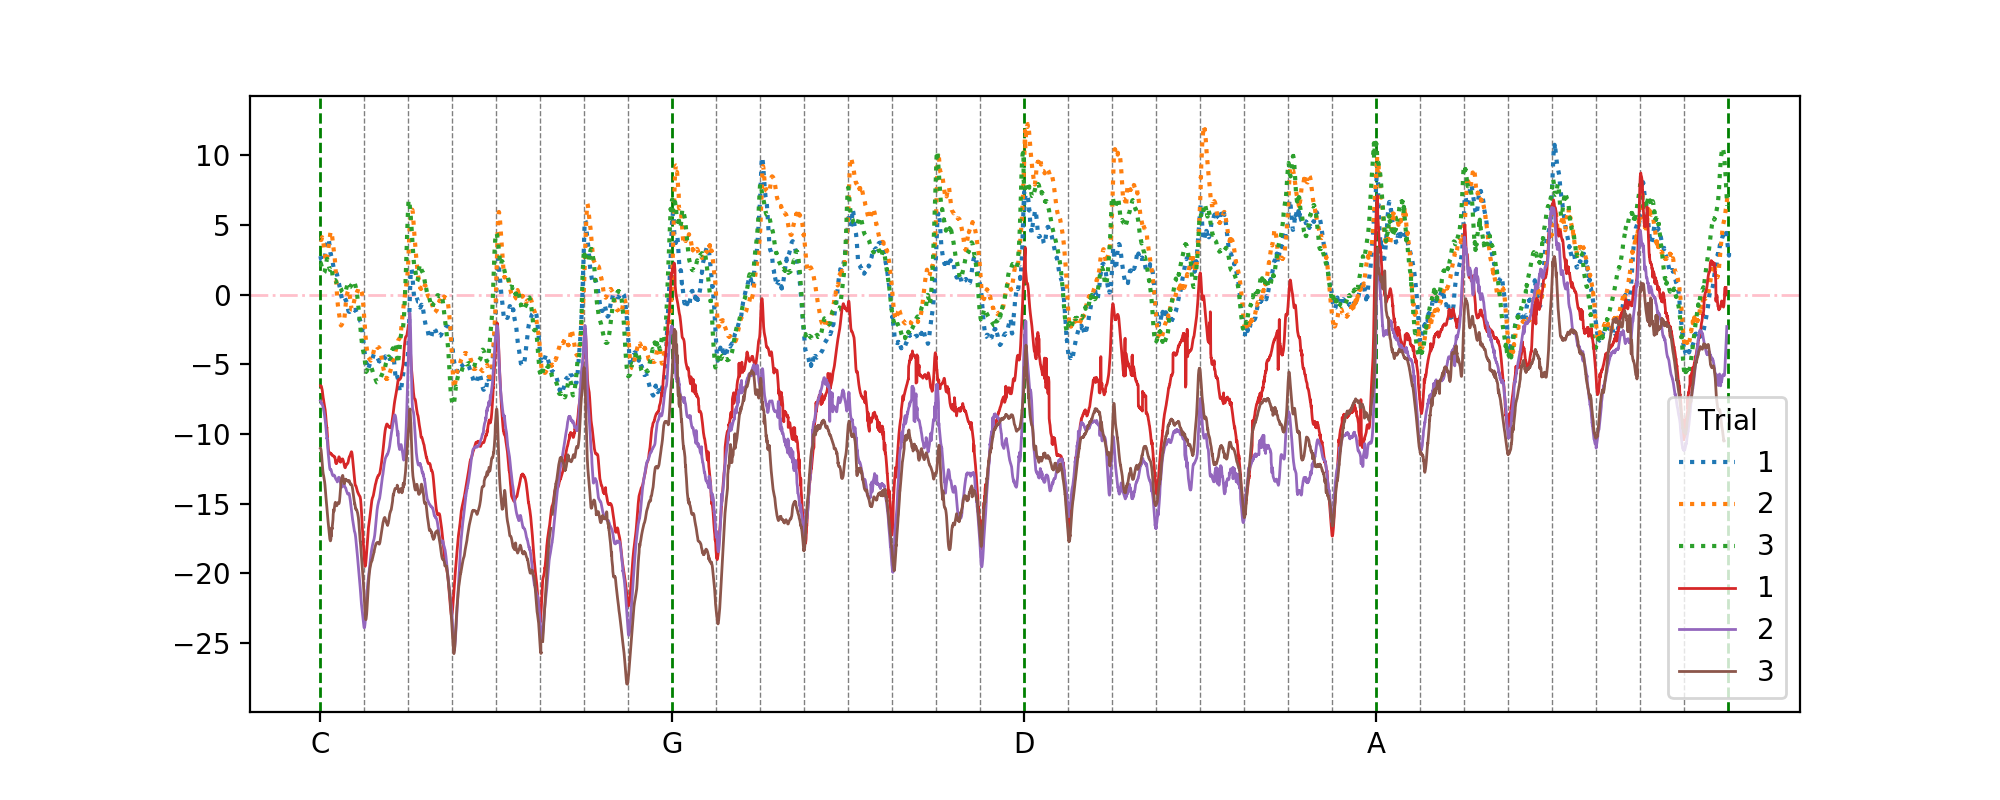

In [469]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
analyze_mocap.add_guide_lines(ax)
skewness["Marina"].plot(figsize=(10,4), ax = ax, linestyle=":")
skewness["Matan"].plot(figsize=(10,4), ax = ax, linewidth=1)
plt.savefig("marina_vs_matan.pdf")

<IPython.core.display.Javascript object>


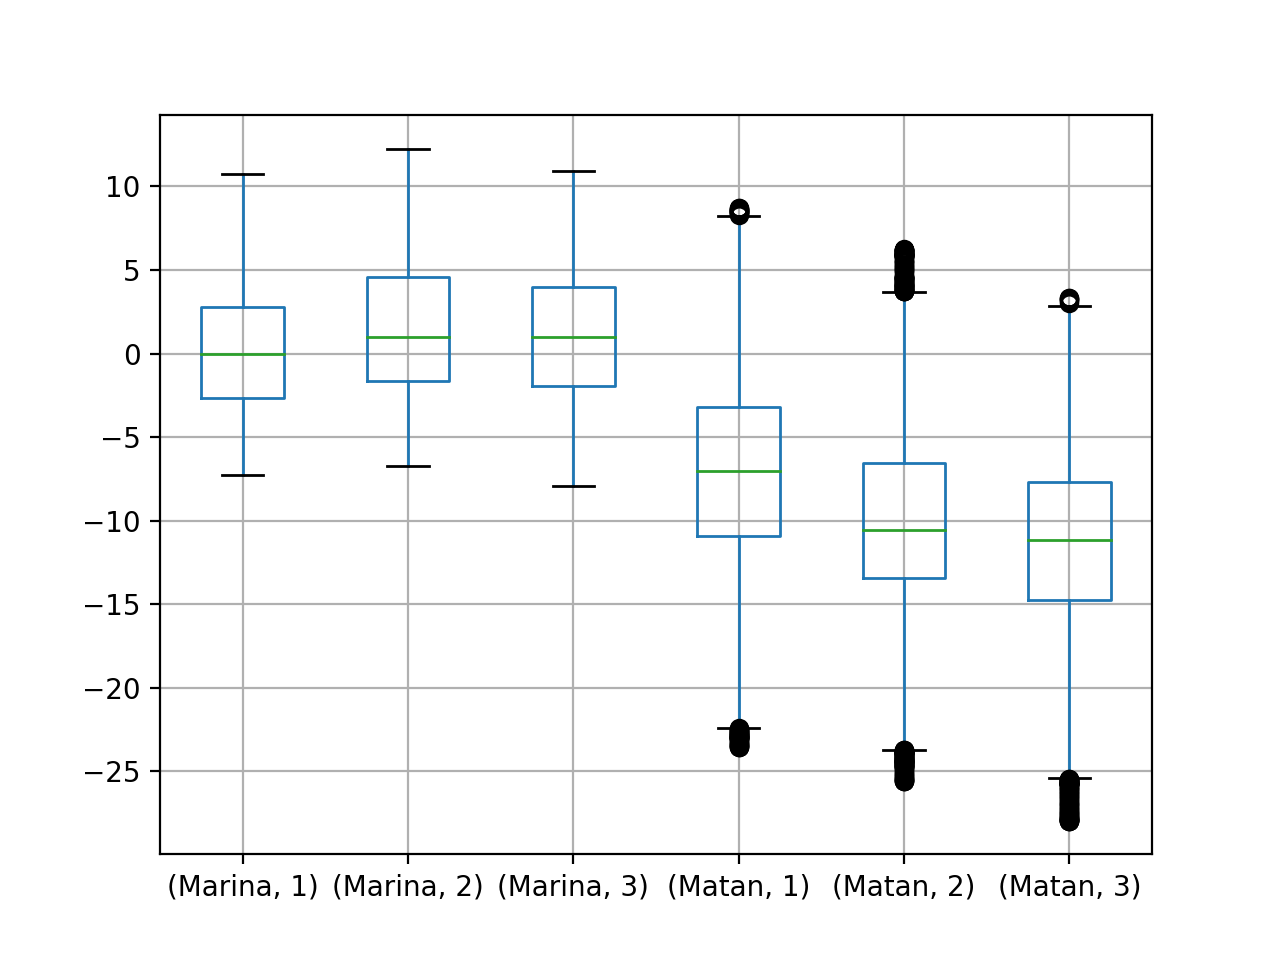

In [470]:
plt.figure()
skewness.boxplot()
plt.savefig("box_plot.pdf")

<IPython.core.display.Javascript object>


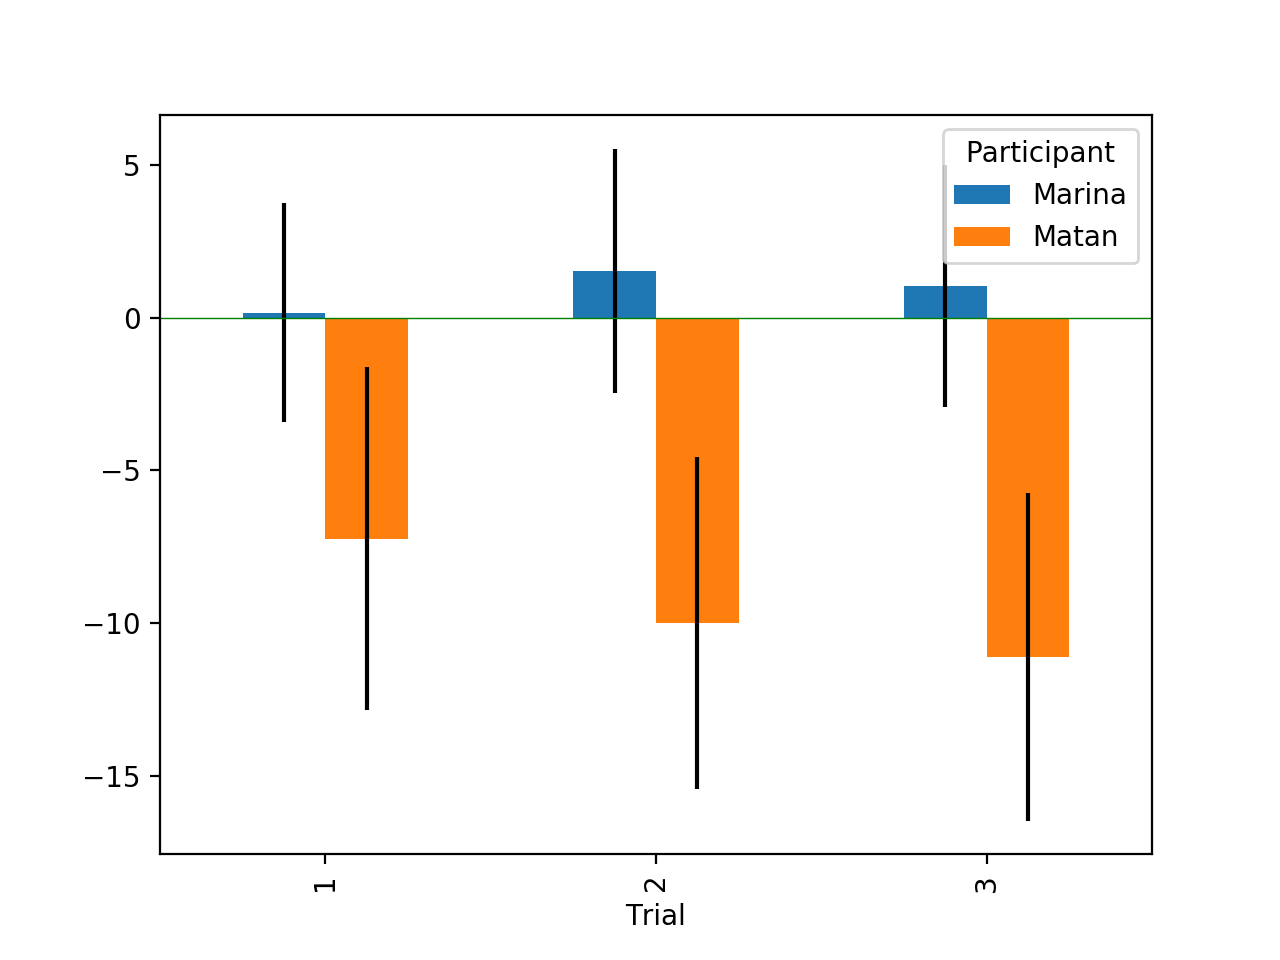

In [471]:
fig, ax = plt.subplots()
means = skewness.mean().unstack("Participant")
errors = skewness.std().unstack("Participant")
means.plot.bar(yerr=errors, ax=ax)
ax.axhline(0, color='green', linewidth=0.5)
plt.savefig("mean_and_error.pdf")

<IPython.core.display.Javascript object>


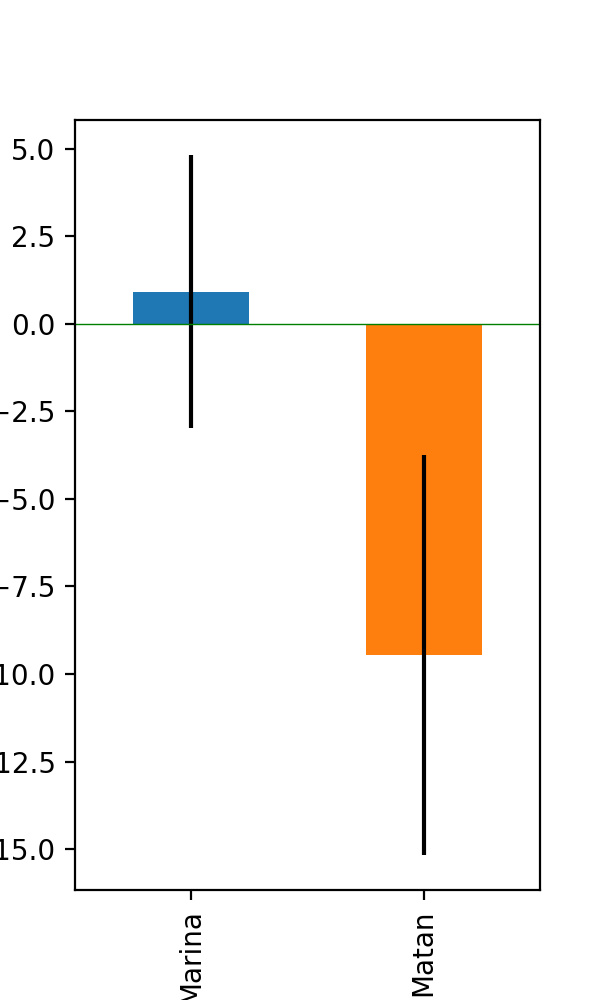

In [472]:
skewness_by_participant = skewness.stack()
fig, ax = plt.subplots()
means = skewness_by_participant.mean()
errors = skewness_by_participant.std()
means.plot.bar(yerr=errors, ax=ax, figsize=(3,5))
ax.axhline(0, color='green', linewidth=0.5)
plt.savefig("mean_and_error_per_participant.pdf")

<IPython.core.display.Javascript object>


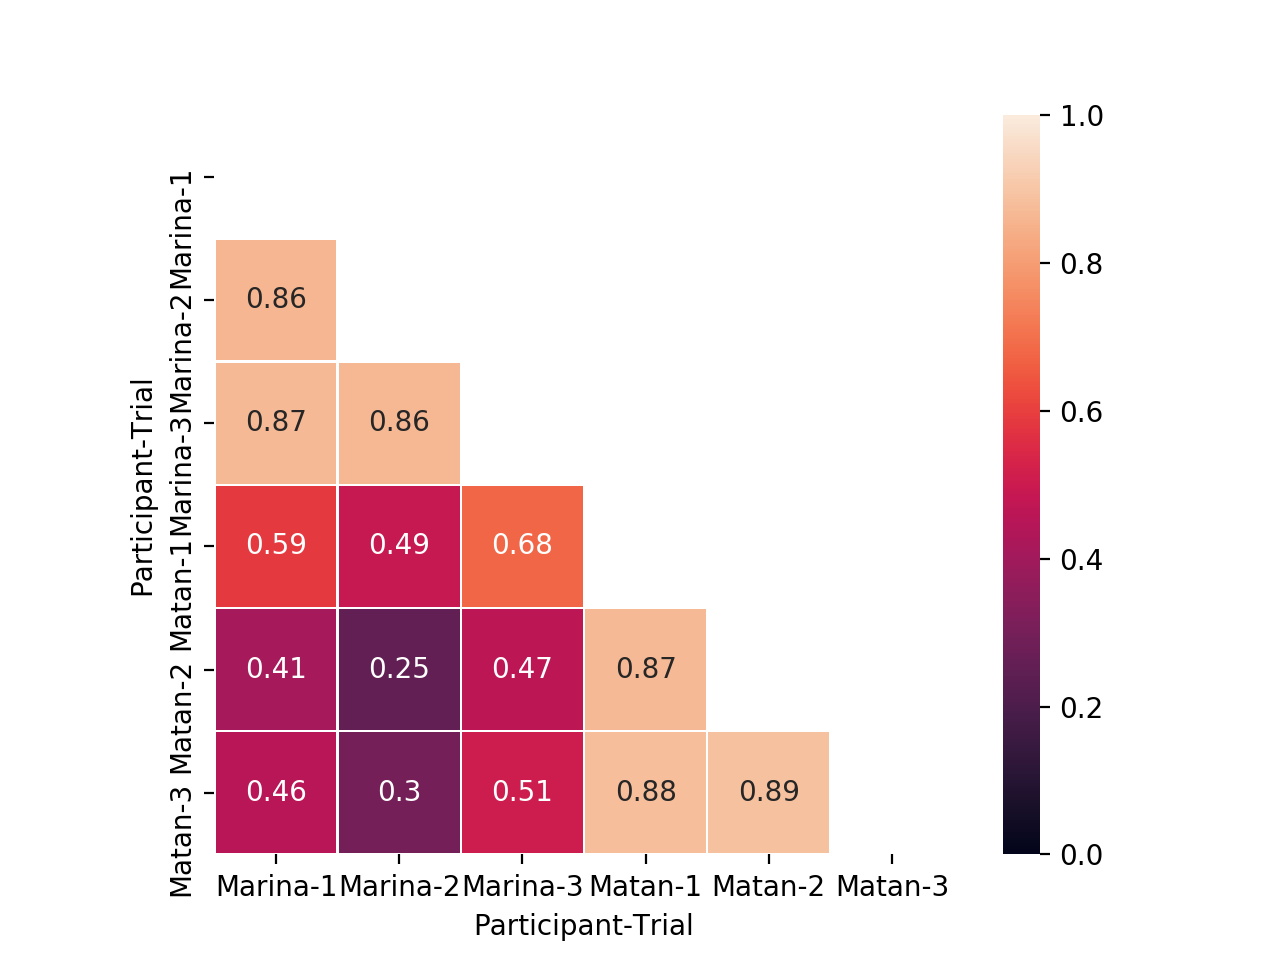

In [473]:
import numpy as np
import seaborn as sns

def plot_correlation(series):
    plt.figure()
    corr = series.corr()
    mask = np.zeros_like(corr)
    # Diagonal mask
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, vmin=0, vmax=1)
    
plot_correlation(skewness)
plt.savefig("correlation.pdf")

In [360]:
def stats_table(series):
    return pd.DataFrame(
        [series.min(), series.max(), series.mean(), series.std()],
        index=["min", "max", "mean", "std"]
    )

In [361]:
stats_table(skewness)

Participant     Marina                            Matan                      
Trial                1          2          3          1          2          3
min          -7.250027  -6.719969  -7.930183 -23.527289 -25.580117 -27.953205
max          10.762043  12.254362  10.925043   8.733938   6.264603   3.347273
mean          0.168317   1.532961   1.041454  -7.244104 -10.006839 -11.111635
std           3.597081   4.007461   3.969231   5.617821   5.448847   5.372083

In [362]:
skewness_by_participant = skewness.stack()
stats_table(skewness_by_participant)

Participant,Marina,Matan
min,-7.930183,-27.953205
max,12.254362,8.733938
mean,0.913885,-9.452390
std,3.903163,5.716755


In [363]:
skewness_by_stroke = skewness[:12800]
new_index = pd.MultiIndex.from_product(
    [
        ["C", "G", "D", "A"],
        [1, 2, 3, 4],
        ["down", "up"],
        np.arange(400)
    ],
    names=("string", "stroke", "direction", "frame")
)
skewness_by_stroke.index = new_index
skewness_by_stroke_columns = skewness_by_stroke.unstack(("string", "stroke", "direction"))
# Unstack changes the order of the index to alphabetical - reorder string level to correct order
skewness_by_stroke_columns_reindexed = skewness_by_stroke_columns.reindex(["C", "G", "D", "A"], axis=1, level="string")
#skewness_by_stroke
#skewness_by_stroke_explicit = skewness_by_stroke.reset_index()

In [365]:
skewness_melted = skewness_by_stroke_columns_reindexed.reset_index().melt(id_vars="frame", value_name="skewness")
skewness_melted['trial_stroke'] = ((skewness_melted['Trial'] - 1) * 4) + skewness_melted['stroke']
#skewness_melted

In [ ]:
downbows = skewness_melted[skewness_melted["direction"] == "down"]
upbows = skewness_melted[skewness_melted["direction"] == "up"]

g = sns.FacetGrid(downbows, col="Participant", row="string", hue="trial_stroke")
g.map(plt.plot, "frame", "skewness")

In [ ]:
g = sns.FacetGrid(upbows, col="Participant", row="string", hue="trial_stroke")
g.map(plt.plot, "frame", "skewness")

<IPython.core.display.Javascript object>


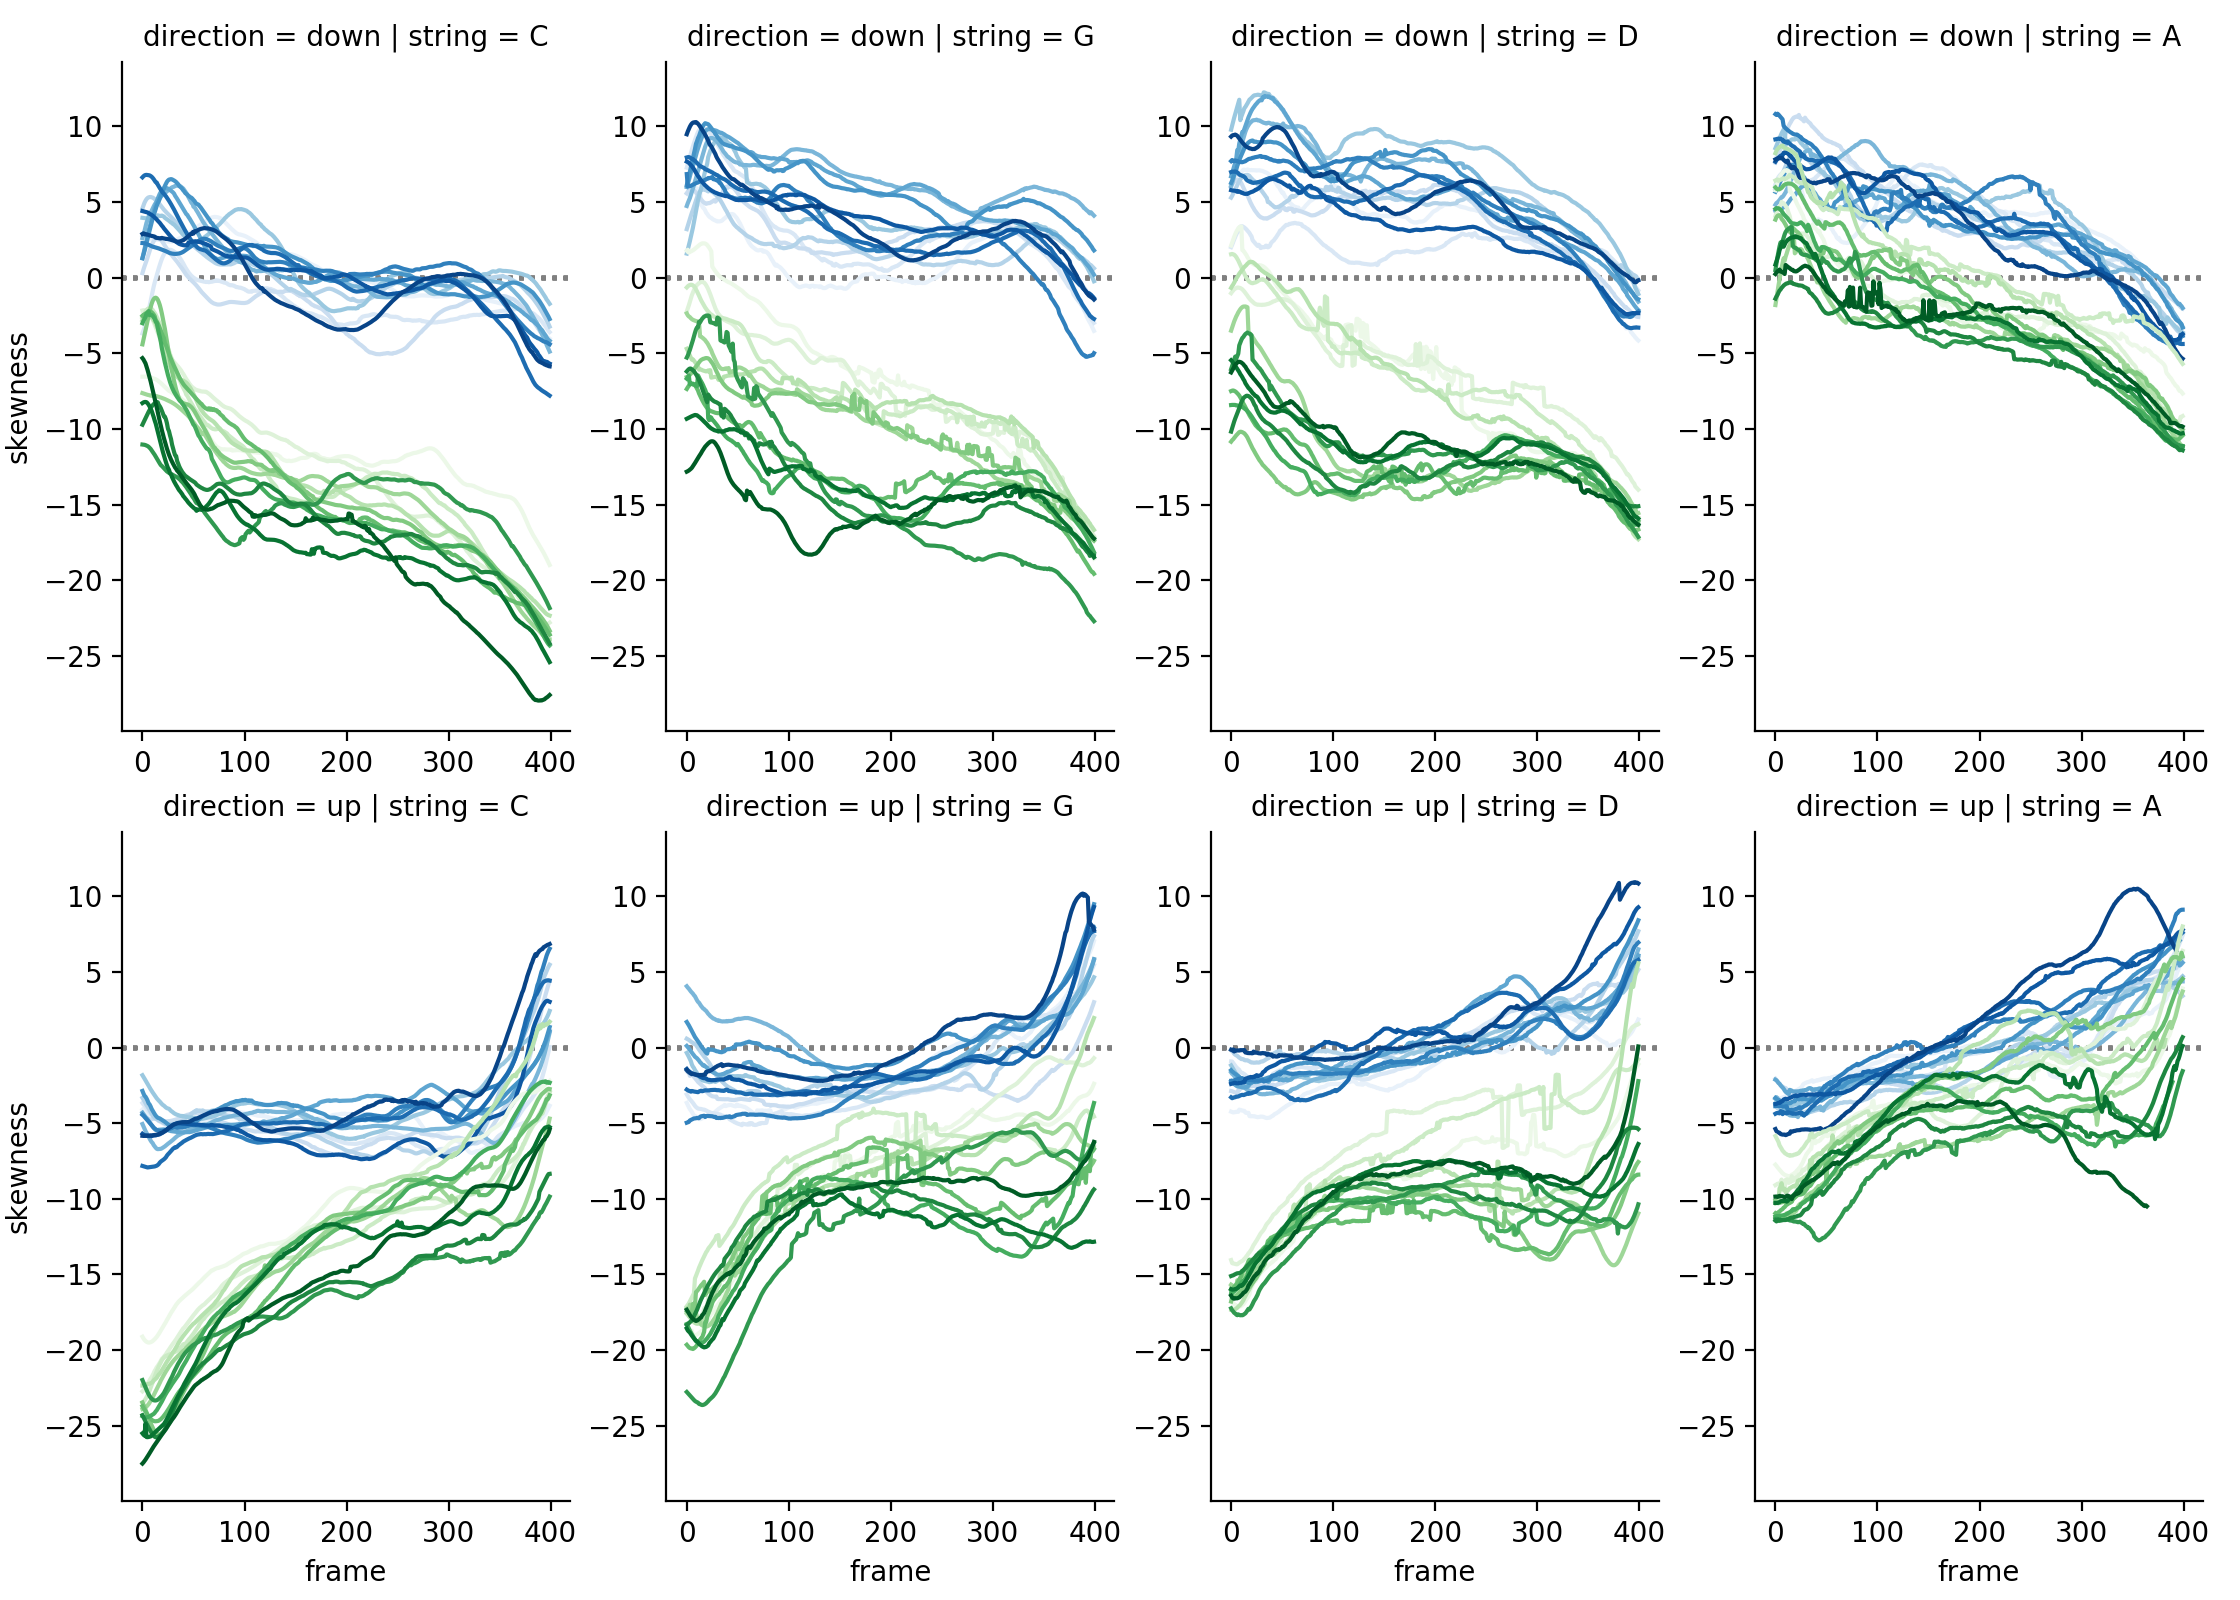

In [502]:
skewness_melted["participant_trial_stroke"] = skewness_melted["Participant"].astype(str) + "_" + skewness_melted["trial_stroke"].astype(str)
g = sns.FacetGrid(skewness_melted, aspect=0.7, size=4, row="direction", col="string", hue="participant_trial_stroke", palette=sns.color_palette("Blues", 12) + sns.color_palette("Greens", 12))
#g.map(plt.scatter, "frame", "value", s=0.5, marker=".")
#marina = skewness_melted[skewness_melted["Participant"] == "Marina"]
#matan = skewness_melted[skewness_melted["Participant"] == "Matan"]

# Draw a horizontal line to show the zero point
g.map(plt.axhline, y=0, ls=":", c=".5")
g.map(plt.plot, "frame", "skewness")
g.savefig("by_participant_string_and_direction.pdf")
g.fig.tight_layout(w_pad=1)

<IPython.core.display.Javascript object>


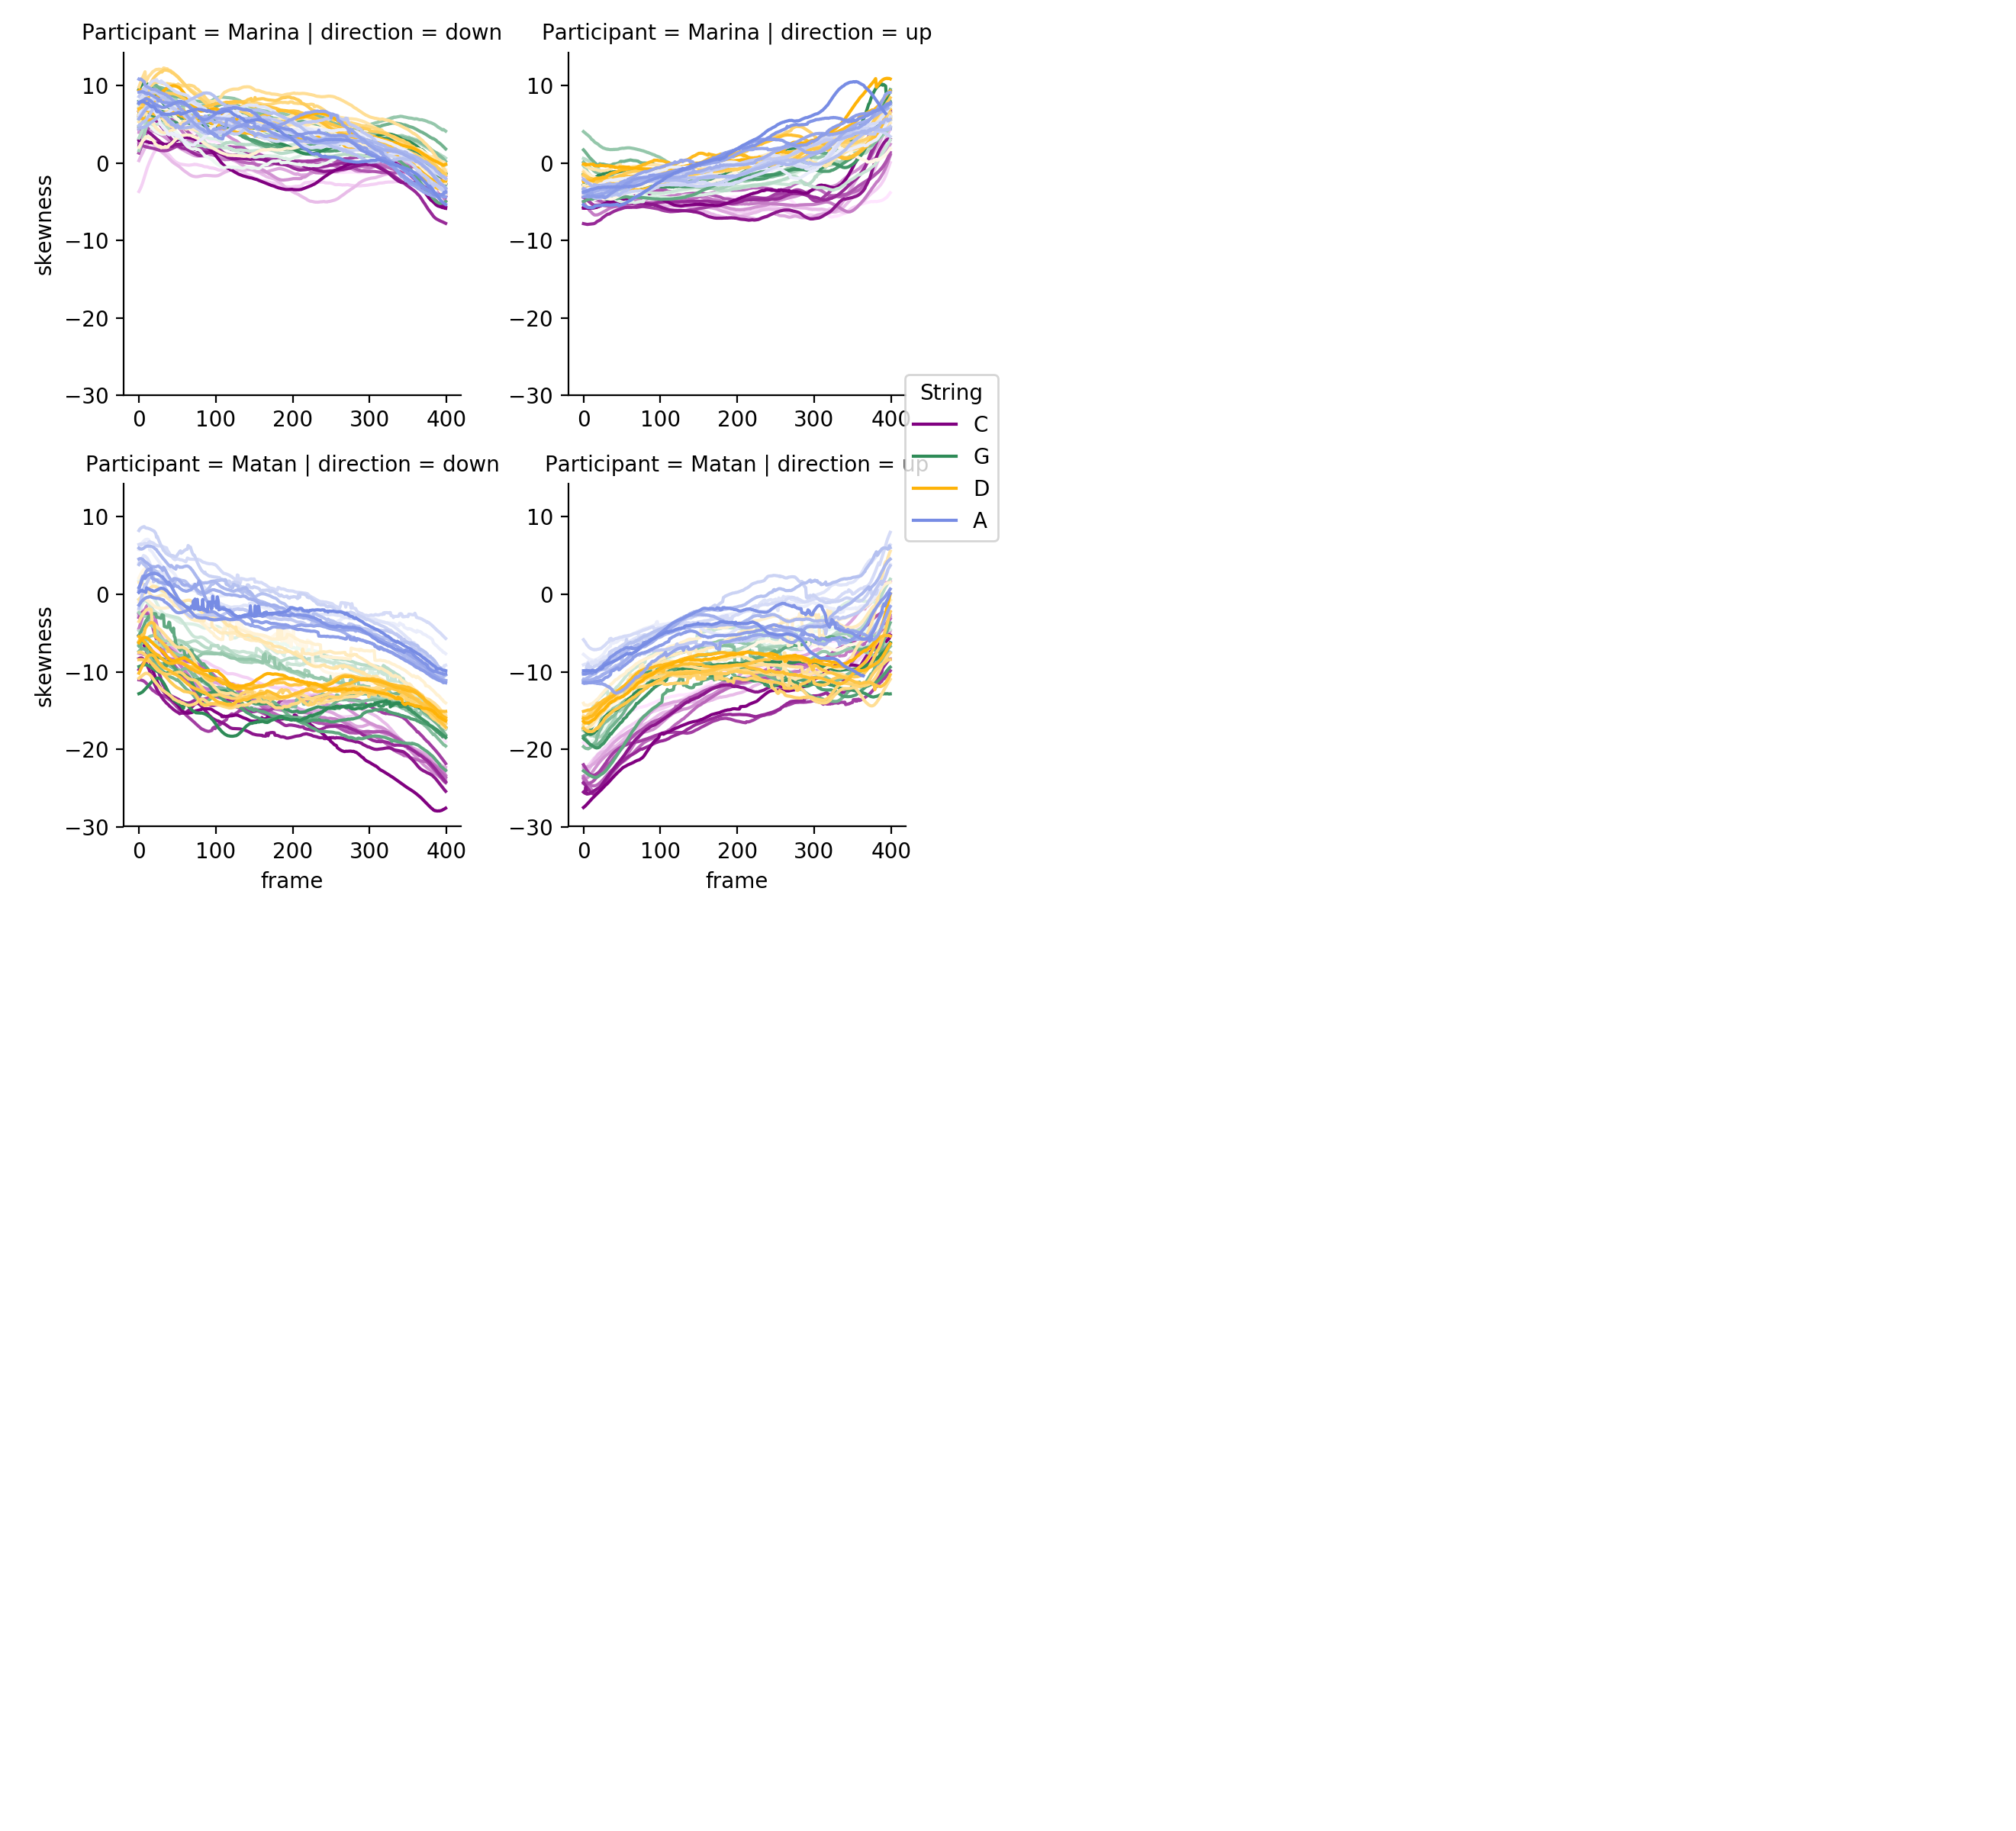

In [468]:
skewness_melted["string_trial_stroke"] = skewness_melted["string"] + "_" + skewness_melted["Trial"].astype(str) + "_" + skewness_melted["stroke"].astype(str)
# colors = (
#     sns.color_palette("Reds", 8) +
#     sns.color_palette("Purples", 8) +
#     sns.color_palette("Blues", 8) +
#     sns.color_palette("Greens", 8)
# )
# colors = (
#     sns.color_palette("BrBG", 24) +
#     sns.color_palette("PRGn", 24)
# )

# colors = sum([[color]*12 for color in ("navy", "magenta", "purple", "blue")], [])
colors = (
    sns.light_palette("purple", 12) +
    sns.light_palette("seagreen", 12) +
    sns.light_palette("amber", 12, input="xkcd") +
    sns.light_palette((260, 75, 60), 12, input="husl")
)
hue_order = ["%s_%s_%s" % (string, trial, stroke) for string in ["C", "G", "D", "A"] for trial in [1,2,3] for stroke in [1,2,3,4]]

g = sns.FacetGrid(skewness_melted, col="direction", row="Participant", hue="string_trial_stroke", palette=colors, hue_order=hue_order)
gg=g.map(plt.plot, "frame", "skewness")#.add_legend()
gg.add_legend({"A": g._legend_data["A_3_4"], "D": g._legend_data["D_3_4"], "G": g._legend_data["G_3_4"], "C": g._legend_data["C_3_4"]}, label_order=["C","G","D","A"], title="String")
#skewness_melted
g.savefig("upbow_vs_downbow.pdf")

<IPython.core.display.Javascript object>


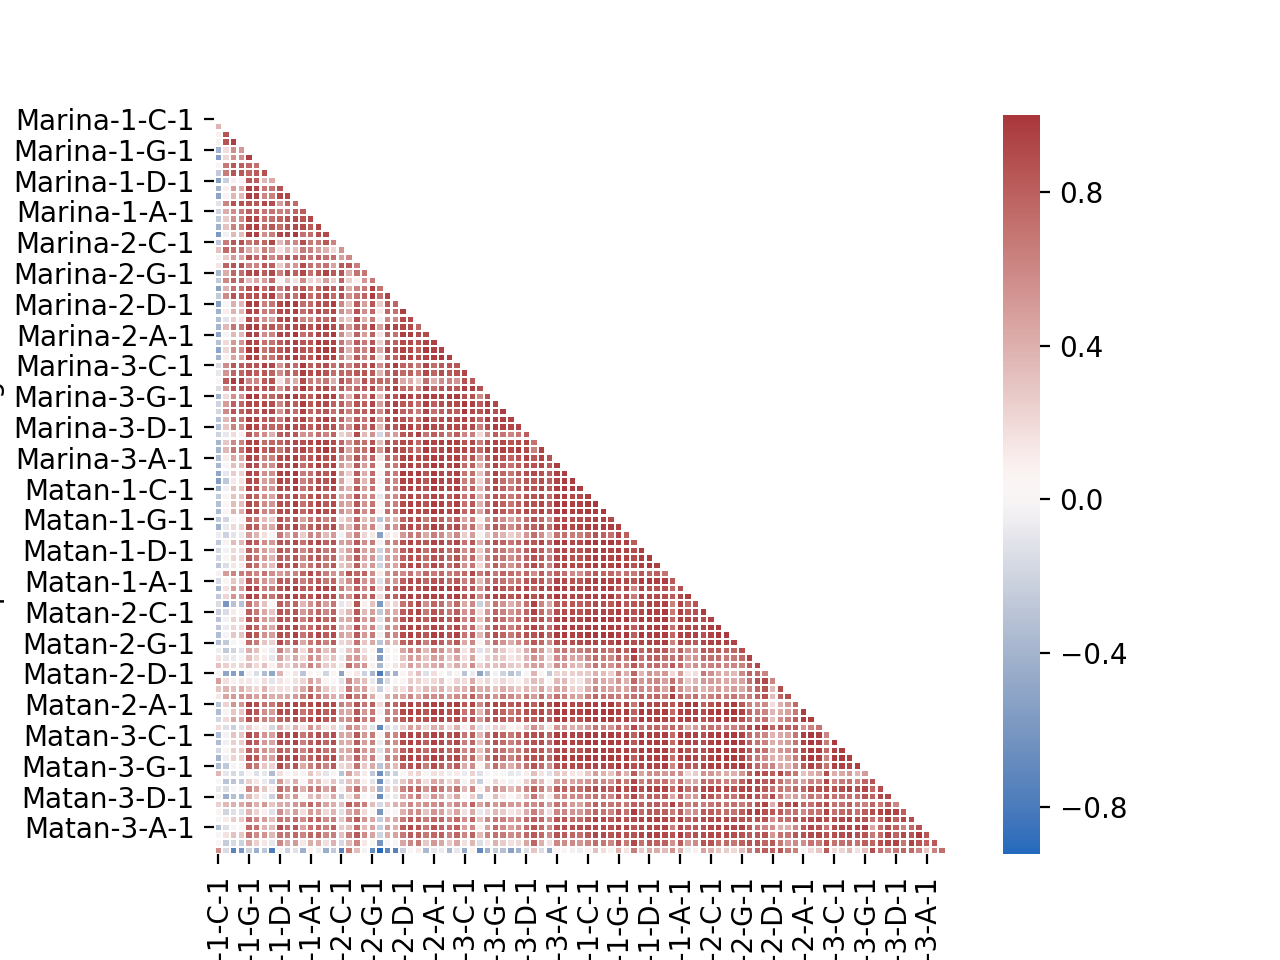

In [413]:
upbows = skewness_by_stroke_columns_reindexed.xs("up", axis=1, level="direction")

def plot_stroke_correlation(series):
    plt.figure()
    corr = series.corr()
    mask = np.zeros_like(corr)
    # Diagonal mask
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, cmap="vlag")#, vmin=0, vmax=1)#, cmap="YlGnBu")
    #ax = sns.clustermap(corr, mask=mask, square=True, linewidths=0.5,  cmap="vlag")#, cmap="YlGnBu"), col_cluster=False, vmin=0, vmax=1,

plot_stroke_correlation(upbows)

In [478]:
skewness_by_stroke_columns_reindexed

Participant    Marina                                                    \
Trial               1                                                     
string              C                                                     
stroke              1                   2                   3             
direction        down        up      down        up      down        up   
frame                                                                     
0            2.767068 -4.102464 -3.684220 -3.672683  0.302413 -4.411984   
1            2.711256 -4.173203 -3.499755 -3.764584  0.540145 -4.458337   
2            2.664213 -4.234417 -3.298596 -3.837548  0.749810 -4.498436   
3            2.621364 -4.250094 -3.069159 -3.933313  0.931507 -4.561625   
4            2.582664 -4.278048 -2.810021 -4.016052  1.130837 -4.622098   
5            2.559016 -4.321199 -2.520317 -4.108248  1.340679 -4.669131   
6            2.545784 -4.366893 -2.199084 -4.205316  1.544910 -4.717749   
7            2.540812 -4.393755 -1.873528 -4.293423  1.762341 -4.756858   
8            2.524279 -4.432391 -1.539832 -4.381661  1.965835 -4.765599   
9            2.535261 -4.486525 -1.213789 -4.453509  2.138303 -4.749756   
10           2.535943 -4.535674 -0.887026 -4.505163  2.291427 -4.716686   
11           2.539872 -4.594413 -0.587107 -4.564111  2.415108 -4.705083   
12           2.535095 -4.656923 -0.317040 -4.628033  2.509582 -4.695795   
13           2.533284 -4.715686 -0.077350 -4.670297  2.575745 -4.691812   
14           2.523636 -4.769601  0.176262 -4.711247  2.622541 -4.702791   
...               ...       ...       ...       ...       ...       ...   
385         -2.924132 -4.918104 -2.479978 -3.004097 -3.073525  0.707408   
386         -2.999324 -4.894360 -2.543343 -2.885777 -3.170411  0.974011   
387         -3.079845 -4.866238 -2.588181 -2.756931 -3.271104  1.254103   
388         -3.175466 -4.835727 -2.650430 -2.614252 -3.378314  1.560682   
389         -3.268360 -4.794026 -2.713478 -2.451569 -3.483199  1.853337   
390         -3.361261 -4.743568 -2.785856 -2.280035 -3.591672  2.159376   
391         -3.447501 -4.681748 -2.861239 -2.112209 -3.639358  2.455374   
392         -3.534355 -4.614946 -2.946143 -1.902455 -3.721025  2.738576   
393         -3.614801 -4.524758 -3.029942 -1.668275 -3.819351  3.010313   
394         -3.700257 -4.465577 -3.126954 -1.417743 -3.944622  3.265321   
395         -3.773643 -4.370455 -3.217754 -1.120664 -4.019823  3.501312   
396         -3.850092 -4.243362 -3.322076 -0.829937 -4.105354  3.738639   
397         -3.920311 -4.129254 -3.422618 -0.535330 -4.191658  3.972732   
398         -3.972838 -3.998935 -3.520442 -0.239244 -4.273157  4.190976   
399         -4.024438 -3.847150 -3.593908  0.039452 -4.339505  4.411330   

Participant                                            ...         Matan  \
Trial                                                  ...             3   
string                                  G              ...             D   
stroke              4                   1              ...             4   
direction        down        up      down        up    ...          down   
frame                                                  ...                 
0            4.585170 -3.328972  5.567441 -3.661422    ...     -6.260432   
1            4.780644 -3.435171  5.495622 -3.808264    ...     -6.132291   
2            4.957757 -3.552566  5.600575 -3.938864    ...     -6.016902   
3            5.090918 -3.682306  5.685696 -4.069827    ...     -5.898162   
4            5.197210 -3.809221  5.771313 -4.169654    ...     -5.774051   
5            5.268623 -3.907293  5.830747 -4.261013    ...     -5.694852   
6            5.311865 -4.014092  5.889475 -4.384663    ...     -5.610520   
7            5.330612 -4.130756  5.916123 -4.484972    ...     -5.553927   
8            5.338115 -4.253702  5.921473 -4.595165    ...     -5.556075   
9            5.319743 -4.382995  5.926948 -4.559096    ...     -5.572867   
10      

In [495]:
# Mean & stdev for each (Participant, String)
skewness_by_string = skewness_by_stroke_columns_reindexed.stack(level=(1, 3, 4))
skewness_by_string = skewness_by_string.reindex(["C", "G", "D", "A"], axis=1, level="string")

<IPython.core.display.Javascript object>


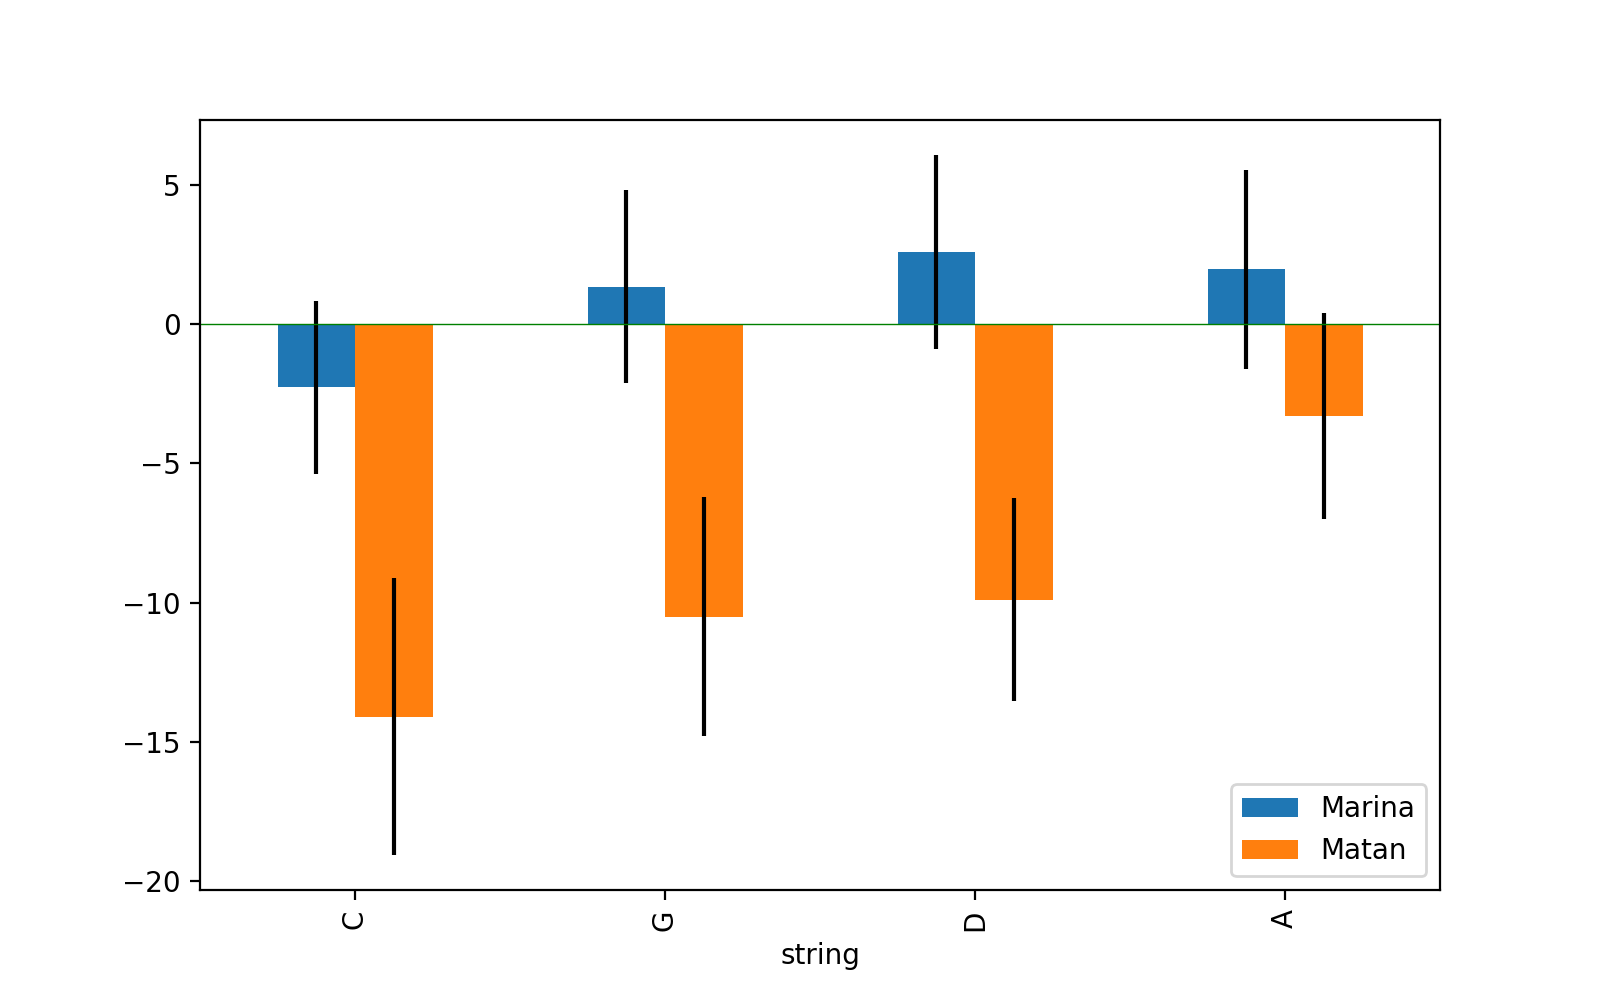

In [494]:
fig, ax = plt.subplots()
means = skewness_by_string.mean().unstack("Participant")
errors = skewness_by_string.std().unstack("Participant")
means.plot.bar(yerr=errors, ax=ax, figsize=(8,5))
ax.axhline(0, color='green', linewidth=0.5)
plt.legend(loc=4)
plt.savefig("mean_and_error_per_string.pdf")